In [63]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

params = {
    "axes.labelsize": 8, "font.size": 8, "legend.fontsize": 8,
    "xtick.labelsize": 8, "ytick.labelsize": 8, "text.usetex": False,
    "font.family": "sans-serif", "axes.spines.top": False, "axes.spines.right": False,
    "grid.color": "grey", "axes.grid": True,  "grid.alpha": 0.5, "grid.linestyle": ":",
}

plt.rcParams.update(params)

In [82]:
portfolios = pd.read_csv('25_Portfolios_5x5_CSV/25_Portfolios_5x5.csv', index_col=0)
factors = pd.read_csv('F-F_Research_Data_Factors_CSV/F-F_Research_Data_Factors.csv', index_col=0)
portfolios_before_63 = pd.read_csv('25_Portfolios_5x5_CSV_before_63/25_Portfolios_5x5.csv', index_col=0)
factors_before_63 = pd.read_csv('F-F_Research_Data_Factors_CSV_before_63/F-F_Research_Data_Factors.csv', index_col=0)

## Problem 3

In [229]:
alphas = np.zeros(portfolios.shape[1])
residuals = np.zeros(portfolios.shape)


for i,key in enumerate(portfolios.keys()):
    
    ## Run the regressions and print the table for the latex
    y = portfolios[key] - factors['RF']
    x = factors[mkt_key]
    x = sm.add_constant(x)
    model = sm.OLS(y,x).fit()
    
    print(f'{key} & {np.mean(y.values):.3f} & {model.params.iloc[0]:.3f} & {model.params.iloc[1]:.3f} & {model.tvalues.iloc[0]:.3f} \\\\')

    ## save alphas and residuals for the test
    alphas[i] = model.params.iloc[0]
    residuals[:,i] = model.resid.values

## Compute all the numbers for the GRS test and the quantile (12.4) in the AP book

factor = factors[mkt_key].values
factor_mean = np.mean(factor)
factor_var = np.var(factor)
T = portfolios.shape[0]
N = portfolios.shape[1]
Sigma = np.zeros((N,N))
for t in range(T):
    Sigma += 1/T * np.outer(residuals[t,:], residuals[t,:])

Sigma_inv = np.linalg.inv(Sigma)
F_stat = (T - N - 1)/N / (1 + (factor_mean/factor_var)**2) * np.matmul(np.matmul(alphas, Sigma_inv), alphas)
chi_stat = T / (1 + (factor_mean/factor_var)**2) * np.matmul(np.matmul(alphas, Sigma_inv), alphas)
quantile_95 = stats.f.ppf(0.95, N, T-N-1)

print()
print(f'The F-stat: {F_stat:.2f}')
print(f'The thershold: {quantile_95}')

print()
print(f'The chi-stat: {chi_stat:.2f}')
print(f'The thershold: {stats.chi2.ppf(0.95, N)}\n')


## The other values asked in (b)

print(np.sqrt(np.inner(alphas,alphas)/N))
print(np.sum(np.abs(alphas))/25)

SMALL LoBM & 0.342 & -0.511 & 1.415 & -2.854 \\
ME1 BM2 & 0.766 & 0.029 & 1.223 & 0.182 \\
ME1 BM3 & 0.781 & 0.109 & 1.114 & 0.842 \\
ME1 BM4 & 0.954 & 0.326 & 1.041 & 2.495 \\
SMALL HiBM & 1.120 & 0.475 & 1.068 & 3.160 \\
ME2 BM1 & 0.539 & -0.290 & 1.376 & -2.135 \\
ME2 BM2 & 0.784 & 0.070 & 1.184 & 0.629 \\
ME2 BM3 & 0.857 & 0.206 & 1.079 & 2.000 \\
ME2 BM4 & 0.896 & 0.279 & 1.023 & 2.649 \\
ME2 BM5 & 1.000 & 0.307 & 1.148 & 2.340 \\
ME3 BM1 & 0.541 & -0.245 & 1.303 & -2.251 \\
ME3 BM2 & 0.785 & 0.110 & 1.120 & 1.290 \\
ME3 BM3 & 0.749 & 0.137 & 1.015 & 1.618 \\
ME3 BM4 & 0.869 & 0.265 & 1.001 & 2.801 \\
ME3 BM5 & 1.006 & 0.350 & 1.088 & 2.812 \\
ME4 BM1 & 0.650 & -0.070 & 1.194 & -0.841 \\
ME4 BM2 & 0.652 & 0.003 & 1.077 & 0.044 \\
ME4 BM3 & 0.728 & 0.117 & 1.012 & 1.501 \\
ME4 BM4 & 0.878 & 0.278 & 0.995 & 3.106 \\
ME4 BM5 & 0.870 & 0.216 & 1.084 & 1.812 \\
BIG LoBM & 0.623 & 0.027 & 0.989 & 0.459 \\
ME5 BM2 & 0.576 & 0.019 & 0.924 & 0.328 \\
ME5 BM3 & 0.587 & 0.066 & 0.863 & 0.896

In [230]:
## Checking CAPM before 63
for i,key in enumerate(portfolios_before_63.keys()):
    
    ## Run the regressions and print the table for the latex
    y = portfolios_before_63[key] - factors_before_63['RF']
    x = factors_before_63[mkt_key]
    x = sm.add_constant(x)
    model = sm.OLS(y,x).fit()
    print(model.tvalues.iloc[0])

-0.8788578490830246
-2.003631680090044
0.03350258365372871
0.6715715656198709
1.0681541822732405
-0.7242851093964561
0.458899660366015
0.2296373287558632
0.5088858059006579
1.084389555661889
0.04920596623485828
1.1034210443165247
1.3437612065481215
0.6939802709980689
-0.21477719933825093
0.1947003373372707
0.6280772017575849
0.30661153534655394
0.14092918711982344
-0.34118252090211626
0.2970806210167227
-0.5238785987921956
0.283569467803896
-1.4396259240811824
0.11374266589308057


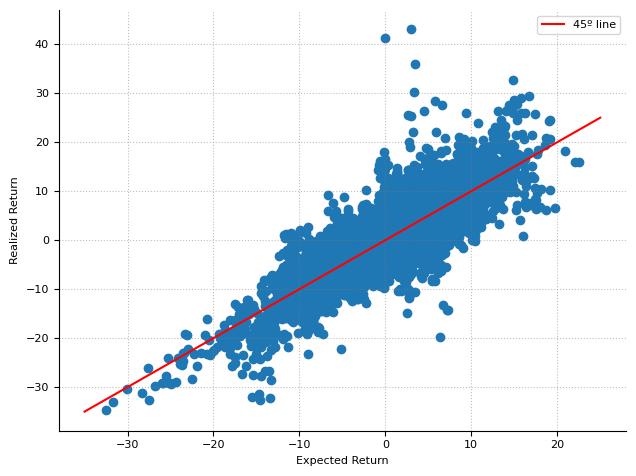

In [231]:
## Running the model without the alphas for (iii)

portfolios_hat = np.zeros(portfolios.shape)
excess_returns = np.zeros(portfolios.shape)
for i,key in enumerate(portfolios.keys()):
    
    ## Run the regressions and print the table for the latex
    y = portfolios[key] - factors['RF']
    x = factors[mkt_key]
    model = sm.OLS(y,x).fit()

    portfolios_hat[:,i] = model.predict(x).values
    excess_returns[:,i] = y
plt.scatter(portfolios_hat,excess_returns)
x = np.linspace(-35, 25)
plt.plot(x, x, color='red', label='45º line')
plt.xlabel('Expected Return')
plt.ylabel('Realized Return')
plt.legend()
plt.tight_layout()
plt.savefig('Figures/1fm_after_63.pdf')
plt.show()

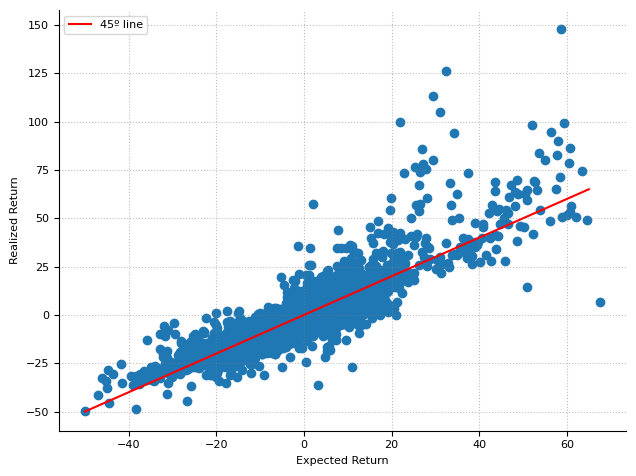

In [232]:
## Running the model without the alphas and data before 1963 for (iv)

portfolios_hat = np.zeros(portfolios_before_63.shape)
excess_returns = np.zeros(portfolios_before_63.shape)
for i,key in enumerate(portfolios_before_63.keys()):
    
    ## Run the regressions and print the table for the latex
    y = portfolios_before_63[key] - factors_before_63['RF']
    x = factors_before_63[mkt_key]
    model = sm.OLS(y,x).fit()

    portfolios_hat[:,i] = model.predict(x).values
    excess_returns[:,i] = y
plt.scatter(portfolios_hat, excess_returns)
x = np.linspace(-50, 65)
plt.plot(x, x, color='red', label='45º line')
plt.xlabel('Expected Return')
plt.ylabel('Realized Return')
plt.legend()
plt.tight_layout()
plt.savefig('Figures/1fm_before_63.pdf')
plt.show()

## Problem 4

SMALL LoBM & -0.452 & -4.878 & 1.102 & 1.403 & -0.254 & 0.902 \\
ME1 BM2 & -0.010 & -0.144 & 0.959 & 1.332 & 0.010 & 0.925 \\
ME1 BM3 & -0.030 & -0.562 & 0.935 & 1.099 & 0.291 & 0.945 \\
ME1 BM4 & 0.118 & 2.457 & 0.890 & 1.086 & 0.476 & 0.951 \\
SMALL HiBM & 0.183 & 2.594 & 0.944 & 1.104 & 0.698 & 0.908 \\
ME2 BM1 & -0.189 & -2.934 & 1.121 & 1.048 & -0.343 & 0.942 \\
ME2 BM2 & 0.007 & 0.126 & 1.014 & 0.927 & 0.103 & 0.947 \\
ME2 BM3 & 0.046 & 0.833 & 0.977 & 0.766 & 0.370 & 0.929 \\
ME2 BM4 & 0.046 & 0.996 & 0.953 & 0.740 & 0.566 & 0.946 \\
ME2 BM5 & -0.017 & -0.353 & 1.079 & 0.896 & 0.798 & 0.955 \\
ME3 BM1 & -0.125 & -2.136 & 1.103 & 0.752 & -0.371 & 0.942 \\
ME3 BM2 & 0.041 & 0.714 & 1.020 & 0.596 & 0.142 & 0.923 \\
ME3 BM3 & -0.031 & -0.532 & 0.982 & 0.448 & 0.414 & 0.905 \\
ME3 BM4 & 0.020 & 0.370 & 0.997 & 0.443 & 0.618 & 0.918 \\
ME3 BM5 & 0.014 & 0.211 & 1.088 & 0.582 & 0.849 & 0.906 \\
ME4 BM1 & 0.056 & 0.974 & 1.064 & 0.409 & -0.364 & 0.928 \\
ME4 BM2 & -0.071 & -1.168 & 1.05

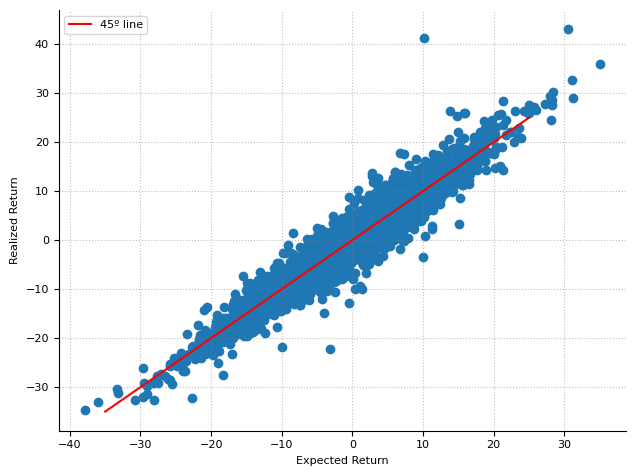

In [242]:
alphas = np.zeros(portfolios.shape[1])
alphas_ts = np.zeros(portfolios.shape[1])
residuals = np.zeros(portfolios.shape)


for i,key in enumerate(portfolios.keys()):
    
    ## Run the regressions and print the table for the latex
    y = portfolios[key] - factors['RF']
    x = factors[factors.keys()[:3]]
    x = sm.add_constant(x)
    model = sm.OLS(y,x).fit()
    
    print(f'{key} & {model.params.iloc[0]:.3f} & {model.tvalues.iloc[0]:.3f} & {model.params.iloc[1]:.3f} & {model.params.iloc[2]:.3f} & {model.params.iloc[3]:.3f} & {model.rsquared:.3f} \\\\')

    ## save alphas and residuals for the test
    alphas[i] = model.params.iloc[0]
    alphas_ts[i] = model.tvalues.iloc[0]
    residuals[:,i] = model.resid.values

## Compute all the numbers for the GRS test and the quantile (12.4) in the AP book

factor = factors[factors.keys()[:3]]
factor_mean = factor.mean().values
factor_var = factor.cov().values
factor_var_inv = np.linalg.inv(factor_var)
T = portfolios.shape[0]
N = portfolios.shape[1]
Sigma = np.zeros((N,N))
for t in range(T):
    Sigma += 1/T * np.outer(residuals[t,:], residuals[t,:])

Sigma_inv = np.linalg.inv(Sigma)
F_stat = (T - N - 3)/N / (1 + np.matmul(np.matmul(factor_mean, factor_var_inv), factor_mean)) * np.matmul(np.matmul(alphas, Sigma_inv), alphas)
chi_stat = T / (1 + np.matmul(np.matmul(factor_mean, factor_var_inv), factor_mean)) * np.matmul(np.matmul(alphas, Sigma_inv), alphas)
quantile_95 = stats.f.ppf(0.95, N, T-N-1)

print()
print(f'The F-stat: {F_stat:.2f}')
print(f'The thershold: {quantile_95}')

print()
print(f'The chi-stat: {chi_stat:.2f}')
print(f'The thershold: {stats.chi2.ppf(0.95, N)}\n')


## The other values asked in (b)

print(np.sqrt(np.inner(alphas,alphas)/N))
print(np.sum(np.abs(alphas))/25)

portfolios_hat = np.zeros(portfolios.shape)
excess_returns = np.zeros(portfolios.shape)
for i,key in enumerate(portfolios.keys()):
    
    ## Run the regressions and print the table for the latex
    y = portfolios[key] - factors['RF']
    x = factors[factors.keys()[:3]]
    model = sm.OLS(y,x).fit()

    portfolios_hat[:,i] = model.predict(x).values
    excess_returns[:,i] = y
plt.scatter(portfolios_hat,excess_returns)
x = np.linspace(-35, 25)
plt.plot(x, x, color='red', label='45º line')
plt.xlabel('Expected Return')
plt.ylabel('Realized Return')
plt.legend()
plt.tight_layout()
plt.savefig('Figures/3fm_after_63.pdf')
plt.show()


The F-stat: 1.49
The thershold: 1.53910995079221

The chi-stat: 40.28
The thershold: 37.65248413348277

0.1204765040183265
0.09540472300175865


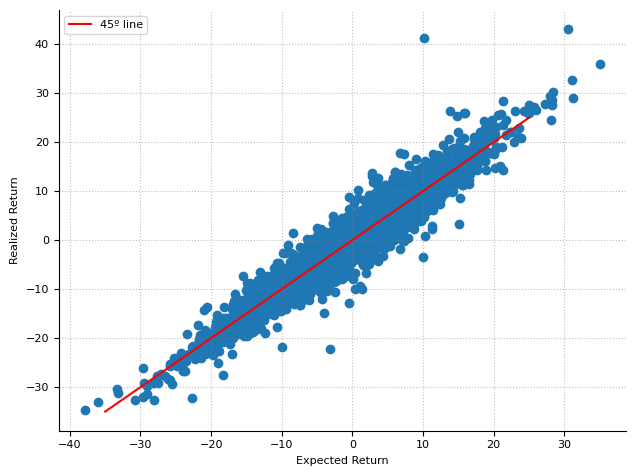

In [243]:
## Looking at the results between 1963 and 1992 for the FF paper:

num_months = 360

alphas = np.zeros(portfolios.iloc[:num_months].shape[1])
alphas_ts_92 = np.zeros(portfolios.iloc[:num_months].shape[1])
residuals = np.zeros(portfolios.iloc[:num_months].shape)


for i,key in enumerate(portfolios.keys()):
    
    ## Run the regressions and print the table for the latex
    y = portfolios.iloc[:num_months][key] - factors.iloc[:num_months]['RF']
    x = factors.iloc[:num_months][factors.keys()[:3]]
    x = sm.add_constant(x)
    model = sm.OLS(y,x).fit()
    
    # print(f'{key} & {model.params.iloc[0]:.3f} & {model.tvalues.iloc[0]:.3f} & {model.params.iloc[1]:.3f} & {model.params.iloc[2]:.3f} & {model.params.iloc[3]:.3f} & {model.rsquared:.3f} \\\\')

    ## save alphas and residuals for the test
    alphas[i] = model.params.iloc[0]
    alphas_ts_92[i] = model.tvalues.iloc[0]
    residuals[:,i] = model.resid.values

## Compute all the numbers for the GRS test and the quantile (12.4) in the AP book

factor = factors.iloc[:num_months][factors.keys()[:3]]
factor_mean = factor.iloc[:num_months].mean().values
factor_var = factor.iloc[:num_months].cov().values
factor_var_inv = np.linalg.inv(factor_var)
T = portfolios.iloc[:num_months].shape[0]
N = portfolios.iloc[:num_months].shape[1]
Sigma = np.zeros((N,N))
for t in range(T):
    Sigma += 1/T * np.outer(residuals[t,:], residuals[t,:])

Sigma_inv = np.linalg.inv(Sigma)
F_stat = (T - N - 3)/N / (1 + np.matmul(np.matmul(factor_mean, factor_var_inv), factor_mean)) * np.matmul(np.matmul(alphas, Sigma_inv), alphas)
chi_stat = T / (1 + np.matmul(np.matmul(factor_mean, factor_var_inv), factor_mean)) * np.matmul(np.matmul(alphas, Sigma_inv), alphas)
quantile_95 = stats.f.ppf(0.95, N, T-N-1)

print()
print(f'The F-stat: {F_stat:.2f}')
print(f'The thershold: {quantile_95}')

print()
print(f'The chi-stat: {chi_stat:.2f}')
print(f'The thershold: {stats.chi2.ppf(0.95, N)}\n')


## The other values asked in (b)

print(np.sqrt(np.inner(alphas,alphas)/N))
print(np.sum(np.abs(alphas))/25)

portfolios_hat = np.zeros(portfolios.shape)
excess_returns = np.zeros(portfolios.shape)
for i,key in enumerate(portfolios.keys()):
    
    ## Run the regressions and print the table for the latex
    y = portfolios[key] - factors['RF']
    x = factors[factors.keys()[:3]]
    model = sm.OLS(y,x).fit()

    portfolios_hat[:,i] = model.predict(x).values
    excess_returns[:,i] = y
plt.scatter(portfolios_hat,excess_returns)
x = np.linspace(-35, 25)
plt.plot(x, x, color='red', label='45º line')
plt.xlabel('Expected Return')
plt.ylabel('Realized Return')
plt.legend()
plt.tight_layout()
# plt.savefig('Figures/3fm_after_63.pdf')
plt.show()

## Problem 5

In [244]:
sigma = portfolios.cov()
sigma_inv = np.linalg.inv(sigma)
mu = portfolios.mean()
rf = factors['RF'].mean()
mu_excess = mu - rf

omega = np.matmul(mu_excess, sigma_inv)

RMV = np.matmul(omega, np.transpose(portfolios))

alphas_rmv = np.zeros(portfolios.shape[1])
alphas_ts_rmv = np.zeros(portfolios.shape[1])
for i,key in enumerate(portfolios.keys()):
    
    ## Run the regressions and print the table for the latex
    y = portfolios[key] - factors['RF']
    x = RMV
    x = sm.add_constant(x)
    model = sm.OLS(y,x).fit()
    alphas_rmv[i] = model.params.iloc[0]
    alphas_ts_rmv[i] = model.tvalues.iloc[0]
    # print(model.tvalues.iloc[0])
    print(f'The R^2 for the model:{model.rsquared:.2f}')

The R^2 for the model:0.01
The R^2 for the model:0.08
The R^2 for the model:0.11
The R^2 for the model:0.17
The R^2 for the model:0.21
The R^2 for the model:0.04
The R^2 for the model:0.11
The R^2 for the model:0.15
The R^2 for the model:0.18
The R^2 for the model:0.17
The R^2 for the model:0.04
The R^2 for the model:0.13
The R^2 for the model:0.14
The R^2 for the model:0.18
The R^2 for the model:0.19
The R^2 for the model:0.08
The R^2 for the model:0.10
The R^2 for the model:0.14
The R^2 for the model:0.19
The R^2 for the model:0.14
The R^2 for the model:0.11
The R^2 for the model:0.11
The R^2 for the model:0.12
The R^2 for the model:0.09
The R^2 for the model:0.11


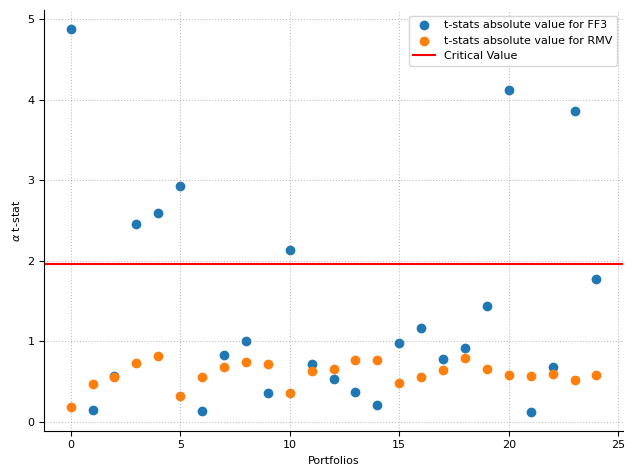

In [248]:
plt.scatter(range(len(alphas_ts)),np.abs(alphas_ts), label='t-stats absolute value for FF3')
plt.scatter(range(len(alphas_ts)),np.abs(alphas_ts_rmv), label='t-stats absolute value for RMV')
plt.axhline(1.96, color='r', label='Critical Value')
plt.legend()
plt.xlabel('Portfolios')
plt.ylabel(r'$\alpha$ t-stat')
plt.tight_layout()
plt.savefig('Figures/alphas_p5.pdf')
plt.show()

## Problem 6

In [246]:
factors_matrix = factors[factors.keys()[:3]]

sigma = factors_matrix.cov()
sigma_inv = np.linalg.inv(sigma)
mu = factors_matrix.mean()
# rf = factors['RF'].mean()
# mu_excess = mu - rf

omega = np.matmul(mu, sigma_inv)

RMV_factors = np.matmul(omega, np.transpose(factors_matrix))

alphas_rmv_factors = np.zeros(portfolios.shape[1])
alphas_ts_rmv_factors = np.zeros(portfolios.shape[1])
for i,key in enumerate(portfolios.keys()):
    
    ## Run the regressions and print the table for the latex
    y = portfolios[key] - factors['RF']
    x = RMV_factors
    x = sm.add_constant(x)
    model = sm.OLS(y,x).fit()
    alphas_rmv_factors[i] = model.params.iloc[0]
    alphas_ts_rmv_factors[i] = model.tvalues.iloc[0]
    # print(model.tvalues.iloc[0])

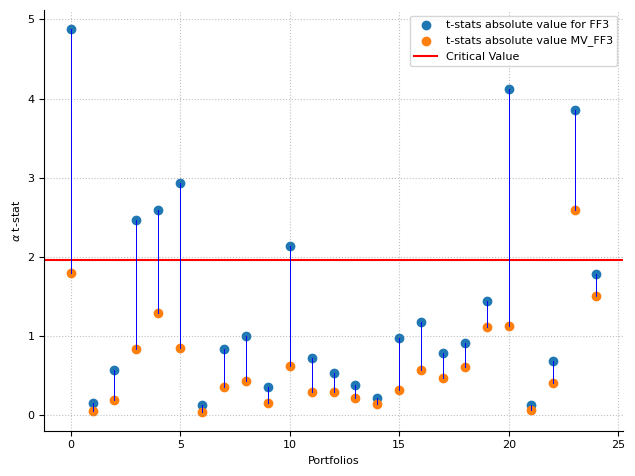

In [249]:
plt.scatter(range(len(alphas_ts)),np.abs(alphas_ts), label='t-stats absolute value for FF3')
plt.scatter(range(len(alphas_ts)),np.abs(alphas_ts_rmv_factors), label='t-stats absolute value MV_FF3')
plt.axhline(1.96, color='r', label='Critical Value')
for i in range(len(alphas_ts)):
    y1 = np.abs(alphas_ts)[i]
    y2 = np.abs(alphas_ts_rmv_factors)[i]
    plt.plot([i, i], [y1, y2], color='blue', linewidth=0.7)

plt.legend()
plt.xlabel('Portfolios')
plt.ylabel(r'$\alpha$ t-stat')
plt.tight_layout()
plt.savefig('Figures/alphas_p6.pdf')
plt.show()